In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
%matplotlib inline

In [2]:
df_history = pd.read_csv("history.csv", parse_dates=["pay_date", "start_date", "expiration_date", "on_date"])
df_test = pd.read_csv("test.csv", parse_dates=["on_date"])
df_users = pd.read_csv("users.csv", parse_dates=["regdate"])

In [3]:
df_history.shape

(14529, 9)

In [4]:
df_history.dtypes

user_id                     int64
service_id                  int64
nth_renewal                 int64
pay_date           datetime64[ns]
start_date         datetime64[ns]
expiration_date    datetime64[ns]
amount                      int64
on_date            datetime64[ns]
churn                     float64
dtype: object

In [5]:
df_history.describe(include='all')

,user_id,service_id,nth_renewal,pay_date,start_date,expiration_date,amount,on_date,churn
count,14529.000000,14529.000000,14529.000000,14529,14529,14529,14529.000000,14529,12653.000000
unique,NaN,NaN,NaN,371,371,369,NaN,369,NaN
top,NaN,NaN,NaN,2019-02-26 00:00:00,2019-02-28 00:00:00,2019-02-28 00:00:00,NaN,2019-02-14 00:00:00,NaN
freq,NaN,NaN,NaN,100,129,183,NaN,183,NaN
first,NaN,NaN,NaN,2018-05-09 00:00:00,2018-05-09 00:00:00,2018-06-09 00:00:00,NaN,2018-05-26 00:00:00,NaN
last,NaN,NaN,NaN,2019-05-14 00:00:00,2019-05-14 00:00:00,2019-06-14 00:00:00,NaN,2019-05-31 00:00:00,NaN
mean,2157.243582,3160.202285,1.485512,NaN,NaN,NaN,1.618969,NaN,0.363866
std,1414.404575,1981.868661,2.144607,NaN,NaN,NaN,1.603072,NaN,0.481130
min,0.000000,0.000000,0.000000,NaN,NaN,NaN,1.000000,NaN,0.000000
25%,980.000000,1443.000000,0.000000,NaN,NaN,NaN,1.000000,NaN,0.000000


In [6]:
df_users.shape

(5275, 2)

In [7]:
df_history['regdate'] = df_history.user_id.map(df_users.set_index('user_id')['regdate'].to_dict())

In [8]:
df_history.describe(include='all')

,user_id,service_id,nth_renewal,pay_date,start_date,expiration_date,amount,on_date,churn,regdate
count,14529.000000,14529.000000,14529.000000,14529,14529,14529,14529.000000,14529,12653.000000,14529
unique,NaN,NaN,NaN,371,371,369,NaN,369,NaN,1486
top,NaN,NaN,NaN,2019-02-26 00:00:00,2019-02-28 00:00:00,2019-02-28 00:00:00,NaN,2019-02-14 00:00:00,NaN,2016-12-04 00:00:00
freq,NaN,NaN,NaN,100,129,183,NaN,183,NaN,238
first,NaN,NaN,NaN,2018-05-09 00:00:00,2018-05-09 00:00:00,2018-06-09 00:00:00,NaN,2018-05-26 00:00:00,NaN,2007-11-30 00:00:00
last,NaN,NaN,NaN,2019-05-14 00:00:00,2019-05-14 00:00:00,2019-06-14 00:00:00,NaN,2019-05-31 00:00:00,NaN,2019-05-14 00:00:00
mean,2157.243582,3160.202285,1.485512,NaN,NaN,NaN,1.618969,NaN,0.363866,NaN
std,1414.404575,1981.868661,2.144607,NaN,NaN,NaN,1.603072,NaN,0.481130,NaN
min,0.000000,0.000000,0.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,NaN
25%,980.000000,1443.000000,0.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,NaN


In [9]:
del df_users

In [10]:
df_history["test"] = df_history["churn"].isnull()

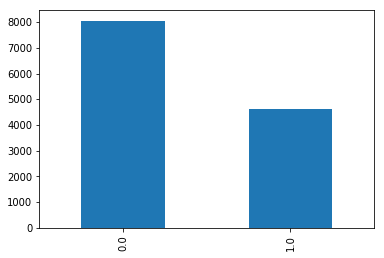

In [11]:
df_history[df_history.test == False].churn.value_counts().plot.bar()

Есть перевес в сторону класса 0.0. Не слишком большой, но возможно имеет смысл отказаться от точности в пользу f1-score.

На всякий случай выполним проверку дат. Начало действия услуги не должно быть после окончания, оплата после начала действия. Так же проверим, что on_date всегда за 14 дней до expiration_date.

In [12]:
start_aftert_exp = (df_history.start_date > df_history.expiration_date).sum()
start_before_pay = (df_history.start_date < df_history.pay_date).sum()
on_date_exp_date_wrong_delta = ((df_history.expiration_date - df_history.on_date) != pd.Timedelta('14 days')).sum()

print("Start after expiration: {}".format(start_aftert_exp))
print("Start before pay: {}".format(start_before_pay))
print("Wrong delta between on date and expiration date: {}".format(on_date_exp_date_wrong_delta))

del start_aftert_exp
del start_before_pay
del on_date_exp_date_wrong_delta

Start after expiration: 0
Start before pay: 22
Wrong delta between on date and expiration date: 0


In [13]:
df_history[df_history.start_date < df_history.pay_date]

,user_id,service_id,nth_renewal,pay_date,start_date,expiration_date,amount,on_date,churn,regdate,test
25,111,130,0,2018-05-18,2018-05-17,2019-05-17,12,2019-05-03,NaN,2017-07-25,True
78,241,294,0,2018-06-22,2018-05-29,2019-05-29,12,2019-05-15,NaN,2015-05-12,True
79,241,295,0,2018-06-22,2018-05-29,2019-05-29,12,2019-05-15,NaN,2015-05-12,True
283,1035,1218,9,2019-05-03,2019-04-18,2019-05-18,1,2019-05-04,NaN,2012-01-30,True
562,2758,3566,6,2019-04-27,2019-04-22,2019-05-22,1,2019-05-08,NaN,2013-11-24,True
2129,126,145,4,2018-12-07,2018-11-22,2018-12-22,1,2018-12-08,0.0,2018-05-17,False
3316,616,738,4,2018-11-10,2018-10-10,2018-11-10,1,2018-10-27,0.0,2018-05-24,False
4605,1035,1218,5,2018-12-19,2018-12-01,2019-01-01,1,2018-12-18,0.0,2012-01-30,False
4606,1035,1218,6,2019-02-15,2019-01-03,2019-02-03,1,2019-01-20,0.0,2012-01-30,False
4608,1035,1218,8,2019-04-09,2019-03-16,2019-04-16,1,2019-04-02,0.0,2012-01-30,False


Интересно, в некоторых случаях услуга начинает действовать до оплаты. Баг? Пробный период? На всякий случай пометим такие случаи.

In [14]:
df_history['start_before_pay'] = df_history.start_date < df_history.pay_date

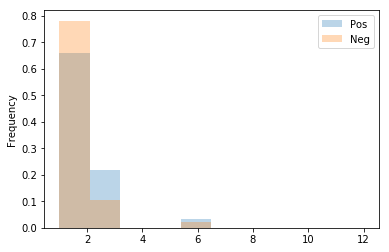

In [15]:
df_history[df_history.churn == 1.0].amount.plot.hist(label='Pos', density=True, alpha=0.3)
df_history[df_history.churn == 0.0].amount.plot.hist(label='Neg', density=True, alpha=0.3)
plt.legend()

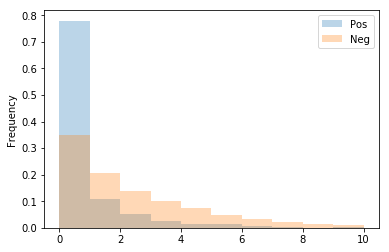

In [16]:
df_history[df_history.churn == 1.0].nth_renewal.plot.hist(label='Pos', density=True, alpha=0.3)
df_history[df_history.churn == 0.0].nth_renewal.plot.hist(label='Neg', density=True, alpha=0.3)
plt.legend()

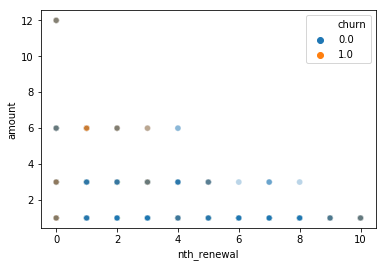

In [17]:
sns.scatterplot(data=df_history, x='nth_renewal', y='amount', hue='churn', alpha=0.3)

Визуально кажется, что большая часть "оранжевых точек" хорошо отделяется диагональной прямой. "Повернем" данные, чтобы классификатору было проще найти разделяющую поверхность.

In [18]:
df_history["amt_renewal"] = df_history.amount - df_history.nth_renewal

Сама по себе дата регистрации пользователя мало привлекательна для прогноза.Более интересно время, которое клиент пользуется сервисом.

В большинстве случаев услуга начинает действовать в тот же день, когда была оплачена. Но иногда запуск услуги происходит позже. Судя по всему, это те случаи, когда клиент оплачивает следующий период до окончания текущего. Пометим такие случаи.

In [19]:
df_history["mounths_after_registration"] = (df_history.on_date - df_history.regdate).dt.days // 30
df_history["paid_in_advance"] = (df_history.start_date > df_history.pay_date)

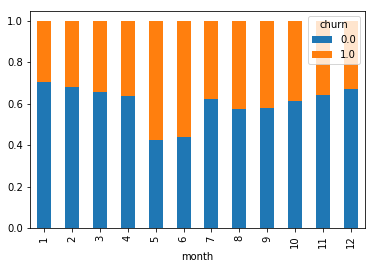

In [20]:
df_history["month"] = df_history.on_date.dt.month
df_history.groupby("month")['churn'].value_counts(normalize=True).unstack().plot.bar(stacked=True)

При классификации может быть важной информация об изменении оплачиваемого периода. Если в первый раз пользователь оплатил 1 месяц, а во второй 12, значит скорее всего у него все хорошо и можно ожидать повторного продления. 

In [21]:
df_history['term_change'] = df_history.sort_values(by='nth_renewal')\
                                .groupby(['user_id', 'service_id'])['amount'].diff().fillna(0)

Посчитаем отношение не продленных услуг ко всем услугам в некоторый период перед **on_date**. Так как продлить услугу можно в течение 60 дней после окончания ее срока действия, уберем из рассмотрения всю историю за 60 дней до **on_date**

In [22]:
period_to_count_churn_rate = pd.Timedelta('180 days')
prolong_period = pd.Timedelta('60 days')

In [23]:
churns = df_history.sort_values(by='on_date').set_index('on_date').rolling('120d', min_periods=100)['churn'].sum()
total_actions = df_history.sort_values(by='on_date').set_index('on_date').rolling('120d', min_periods=100)['churn'].count()

nv_period_churns = df_history.sort_values(by='on_date').set_index('on_date').rolling('60d', min_periods=100)['churn'].sum()
nv_period_total_actions = df_history.sort_values(by='on_date').set_index('on_date').rolling('60d', min_periods=100)['churn'].count()

churns = churns - nv_period_churns
total_actions = total_actions - nv_period_total_actions

In [24]:
churn_rate = (churns / total_actions).fillna(-1)

In [25]:
df_history['churn_rate'] = df_history.on_date.map(churn_rate.to_dict())

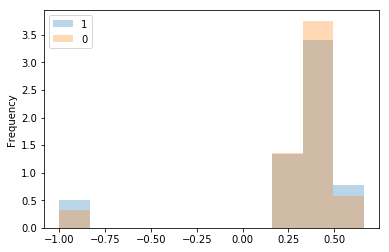

In [26]:
df_history[df_history.churn == 1.0].churn_rate.plot.hist(label='1', alpha=0.3, density=True)
df_history[df_history.churn == 0.0].churn_rate.plot.hist(label='0', alpha=0.3, density=True)
plt.legend()

Узнаем сколько у пользователя активных услуг на момент проверки.

In [27]:
df_history['active_services'] = 0
for date in df_history.on_date.unique():
    temp_history = df_history[(df_history.start_date <= date) & (df_history.expiration_date > date)]
    active_services = temp_history.groupby('user_id')['service_id'].count()
    df_history.loc[df_history.on_date == date, 'active_services'] = \
                        df_history[df_history.on_date == date].user_id.map(active_services.to_dict())
    del temp_history
    del active_services

А так же проверим, не уменьшилось ли их количество по сравнению с предыдущей проверкой.

In [28]:
df_history['active_services_change'] = df_history.sort_values(by='on_date')\
                                        .groupby('user_id')['active_services'].diff().fillna(0)

In [29]:
df_history[df_history.user_id == 68].sort_values(by='on_date')

,user_id,service_id,nth_renewal,pay_date,start_date,expiration_date,amount,on_date,churn,regdate,test,start_before_pay,amt_renewal,mounths_after_registration,paid_in_advance,month,term_change,churn_rate,active_services,active_services_change
5209,68,1450,0,2018-07-11,2018-07-11,2018-08-11,1,2018-07-28,1.0,2018-05-04,False,False,1,2,False,7,0.0,0.470588,2,0.0
6377,68,1930,0,2018-08-02,2018-08-02,2018-09-02,1,2018-08-19,0.0,2018-05-04,False,False,1,3,False,8,0.0,0.588235,3,1.0
6378,68,1930,1,2018-09-01,2018-09-02,2018-10-02,1,2018-09-18,0.0,2018-05-04,False,False,0,4,True,9,0.0,0.476000,4,1.0
6316,68,1904,0,2018-08-01,2018-08-01,2018-11-01,3,2018-10-18,1.0,2018-05-04,False,False,3,5,False,10,0.0,0.415159,4,0.0
7351,68,2341,0,2018-08-23,2018-08-23,2018-11-23,3,2018-11-09,0.0,2018-05-04,False,False,3,6,False,11,0.0,0.418075,3,-1.0
7352,68,2341,1,2018-11-23,2018-11-23,2018-12-23,1,2018-12-09,0.0,2018-05-04,False,False,0,7,False,12,-2.0,0.422094,3,0.0
6379,68,1930,2,2018-10-02,2018-10-02,2019-01-02,3,2018-12-19,1.0,2018-05-04,False,False,1,7,False,12,2.0,0.409519,3,0.0
7353,68,2341,2,2018-12-25,2018-12-25,2019-01-25,1,2019-01-11,1.0,2018-05-04,False,False,-1,8,False,1,0.0,0.390954,2,-1.0
14106,68,6547,0,2019-03-18,2019-03-18,2019-04-18,1,2019-04-04,1.0,2018-05-04,False,False,1,11,False,4,0.0,0.305901,2,0.0
10,68,76,0,2018-05-15,2018-05-15,2019-05-15,12,2019-05-01,NaN,2018-05-04,True,False,12,12,False,5,0.0,0.306204,1,-1.0


In [30]:
df_history = df_history\
    .sort_values(["service_id", "pay_date", "start_date"])
df_history["cumsum_amount"] = df_history.groupby("service_id")['amount'].cumsum()

In [31]:
used_cols = ["nth_renewal", "cumsum_amount", 'amount']
target_col = "churn"

X_train = df_history.query("~test")[used_cols]
y_train = df_history.query("~test")[target_col] == 1.0

X_test = df_history.query("test")[used_cols] 
y_test = df_test[target_col] == True

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
#from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

Для начала построим классификатор только  на тех колонках, которые были в задании. 

Посчитаем **f1-score** на тестовой выборке. Это будет базовым уровнем. 

In [33]:
clf = DecisionTreeClassifier(max_depth=4, min_samples_split=100, min_samples_leaf=20)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=100,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [34]:
predicted = clf.predict(X_test)
print("Baseline classifier score: {}".format(f1_score(y_test, predicted)))

Baseline classifier score: 0.6181254841208366


Теперь посмотрим, что будет, если использовать все доступные данные. Хотя идентификаторы и даты не особо полезны.

In [35]:
cols_to_drop = ['user_id', 'service_id', 'pay_date', 'start_date', 'expiration_date', 'on_date', 'regdate', 'churn', 'test']
target_col = "churn"

X_train = df_history.query("~test").drop(cols_to_drop, axis=1)
y_train = df_history.query("~test")[target_col] == 1.0

X_test = df_history.query("test").drop(cols_to_drop, axis=1)
y_test = df_test[target_col] == True

In [36]:
clf = DecisionTreeClassifier(max_depth=4, min_samples_split=100, min_samples_leaf=20)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=100,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [37]:
predicted = clf.predict(X_test)
print("Classifier score: {}".format(f1_score(y_test, predicted)))

Classifier score: 0.6592544146500982


Попробуем взять только наиболее важные переменные. Возможно оставшиеся только привносят шум. 

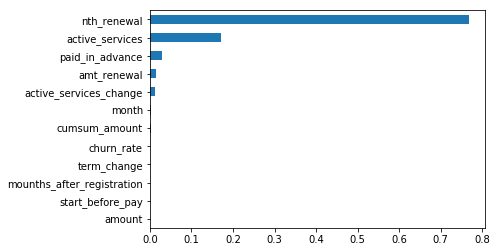

In [38]:
feature_importances = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values()
feature_importances.plot.barh()

In [39]:
most_important_features = feature_importances[-3:].index

In [40]:
clf = DecisionTreeClassifier(max_depth=6, min_samples_split=100, min_samples_leaf=20)
clf.fit(X_train[most_important_features], y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=100,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [41]:
predicted = clf.predict(X_test[most_important_features])
print("Classifier score: {}".format(f1_score(y_test, predicted)))

Classifier score: 0.6617250673854448


Подберем параметры с помощью k-кратной перекрестной проверки. Используем StratifiedKFold, чтобы гарантировать одинаковое соотношение классов во всех частях.

In [42]:
clf = DecisionTreeClassifier()
params = {'max_depth': [2, 4, 6, 8],
         'min_samples_split': [20, 30, 50, 70, 90],
         'min_samples_leaf': [2, 5, 10, 15, 30, 50]}
grid = GridSearchCV(clf, params, scoring='f1', verbose=1, cv=StratifiedKFold(n_splits=5, shuffle=True))

In [43]:
grid.fit(X_train[most_important_features], y_train)
predicted = grid.predict(X_test[most_important_features])
print("Classifier score: {}".format(f1_score(y_test, predicted)))

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Classifier score: 0.6809616634178038


[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    7.0s finished


Так как данные, на которых проводили оценку классификатора не встречались ему при обучении и при подборе параметров, то можно ожидать, что на новых данных результат будет примерно такой же.

In [44]:
grid.best_params_

{'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 20}

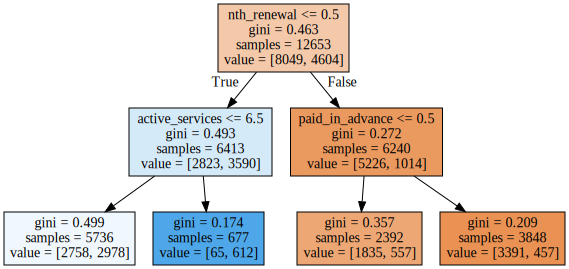

In [45]:
from sklearn import tree
from IPython.display import SVG, display, Image
from graphviz import Source


graph = Source(tree.export_graphviz(grid.best_estimator_, out_file=None, feature_names=list(X_train[most_important_features]), filled=True))
display(SVG(graph.pipe(format='svg')))

In [47]:
precision_score(y_test, predicted)

0.592090395480226

In [48]:
recall_score(y_test, predicted)

0.8012232415902141